In [1]:
import h5py
import matplotlib.pyplot as plt
import os
import numpy as np


# On-Diagonal Detetion (Semrock Filter 730-39)

In [5]:
# File path to your HDF5 file
file_path0 = r'C:\Users\PolyEDM\labscript-suite\userlib\analysislib\lyman29\gain1000\0w\2025-02-26_0010_BaF_Fluorescence_0_rep00050.h5'
# file_path1 = r'C:\Users\PolyEDM\labscript-suite\userlib\analysislib\lyman29\background_730-39\99uw\2025-02-21_0035_BaF_Fluorescence_0_rep00050.h5'
# file_path2 = r'C:\Users\PolyEDM\labscript-suite\userlib\analysislib\lyman29\background_730-39\970uw\2025-02-21_0034_BaF_Fluorescence_0_rep00050.h5'
# file_path3 = r'C:\Users\PolyEDM\labscript-suite\userlib\analysislib\lyman29\background_730-39\10.5mw\2025-02-21_0033_BaF_Fluorescence_0_rep00050.h5'
# file_path4 = r'C:\Users\PolyEDM\labscript-suite\userlib\analysislib\lyman29\background_730-39\49mw\2025-02-21_0030_BaF_Fluorescence_0_rep00050.h5'
file_path5 = r'C:\Users\PolyEDM\labscript-suite\userlib\analysislib\lyman29\gain1000\100mw\2025-02-26_0015_BaF_Fluorescence_0_rep00050.h5'


In [6]:
with h5py.File(file_path0, 'r') as file:
    image_data0 = file['images/camera/fluorescence/frame'][:]
# with h5py.File(file_path1, 'r') as file:
#     image_data1 = file['images/camera/fluorescence/frame'][:]
# with h5py.File(file_path2, 'r') as file:
#     image_data2 = file['images/camera/fluorescence/frame'][:]
# with h5py.File(file_path3, 'r') as file:
#     image_data3 = file['images/camera/fluorescence/frame'][:]
# with h5py.File(file_path4, 'r') as file:
#     image_data4 = file['images/camera/fluorescence/frame'][:]
with h5py.File(file_path5, 'r') as file:
    image_data5 = file['images/camera/fluorescence/frame'][:]
hist0, bin_edges0 = np.histogram(image_data0, bins=1000)  # Adjust the number of bins as needed
# hist1, bin_edges1 = np.histogram(image_data1, bins=1000)  # Adjust the number of bins as needed
# hist2, bin_edges2 = np.histogram(image_data2, bins=1000)  # Adjust the number of bins as needed
# hist3, bin_edges3 = np.histogram(image_data3, bins=1000)  # Adjust the number of bins as needed
# hist4, bin_edges4 = np.histogram(image_data4, bins=1000)  # Adjust the number of bins as needed
hist5, bin_edges5 = np.histogram(image_data5, bins=1000)  # Adjust the number of bins as needed


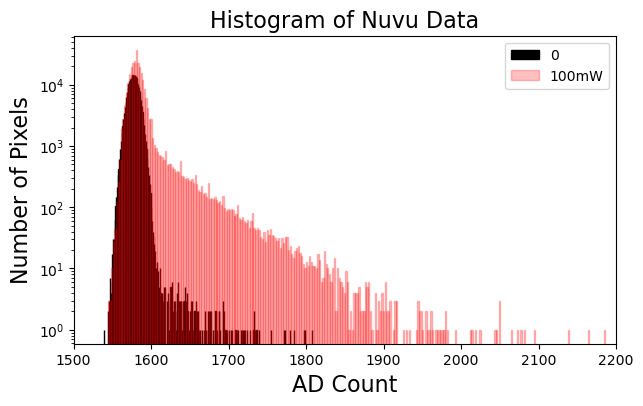

In [9]:
plt.figure(figsize=(7, 4))  # Set figure size

# Plot the histograms using plt.bar (faster than plt.hist)
plt.bar(bin_edges0[:-1], hist0, width=np.diff(bin_edges0) * 0.8, edgecolor='black', color='black', align='edge', label='0')  # 99uW technically
# plt.bar(bin_edges3[:-1], hist3, width=np.diff(bin_edges3) * 0.8, edgecolor='blue', color='blue', alpha=0.5, align='edge', label='10mW')  # 10.5mW technically
plt.bar(bin_edges5[:-1], hist5, width=np.diff(bin_edges5) * 0.8, edgecolor='red', color='red', alpha=0.25, align='edge', label='100mW')  # 113mW technically

# Add title and labels
plt.title('Histogram of Nuvu Data', fontsize=16)
plt.xlabel('AD Count', fontsize=16)
plt.ylabel('Number of Pixels', fontsize=16)
plt.xlim([1500,2200])
# Set the y-axis to logarithmic scale
plt.yscale('log', base=10)

# Add the legend
plt.legend()

# Display the plot
plt.show()


subtract the mean difference...

In [5]:
subtracted_data1 = (image_data1 - (1602.97 - 1602.55)) 
subtracted_data2 = (image_data2 - (1604.96 - 1602.55))
subtracted_data3 = (image_data3 - (1605.99 - 1602.55))
subtracted_data4 = (image_data4 - (1606.70 - 1602.55))
subtracted_data5 = (image_data5 - (1607.48 - 1602.55))

In [6]:
subtracted_hist1, subtracted_bin_edges1 = np.histogram(subtracted_data1, bins=1000)  # Adjust the number of bins as needed
subtracted_hist2, subtracted_bin_edges2 = np.histogram(subtracted_data2, bins=1000)  # Adjust the number of bins as needed
subtracted_hist3, subtracted_bin_edges3 = np.histogram(subtracted_data3, bins=1000)  # Adjust the number of bins as needed
subtracted_hist4, subtracted_bin_edges4 = np.histogram(subtracted_data4, bins=1000)  # Adjust the number of bins as needed
subtracted_hist5, subtracted_bin_edges5 = np.histogram(subtracted_data5, bins=1000)  # Adjust the number of bins as needed

In [7]:
# Plot the histogram using plt.bar (faster than plt.hist)
plt.figure(figsize=(8, 4))
# plt.bar(bin_edges0[:-1], hist0, width=np.diff(bin_edges0), edgecolor='black', color='black',  align='edge', label='0W') #99uW technically
plt.bar(subtracted_bin_edges1[:-1], subtracted_hist1-hist0, width=np.diff(subtracted_bin_edges1, bin_edges0), edgecolor='black', color='black',  align='edge', label='100uW') #99uW technically
plt.bar(subtracted_bin_edges3[:-1], subtracted_hist3, width=np.diff(subtracted_bin_edges3, bin_edges0), edgecolor='blue', color='blue', alpha=0.5,  align='edge', label='10mW') #10.5mW technically
plt.bar(subtracted_bin_edges5[:-1], subtracted_hist5, width=np.diff(subtracted_bin_edges2, bin_edges0), edgecolor='red', color='red', alpha=0.25, align='edge', label='100mW') #113mW technically

# Add title and labels
plt.title('Subtracted Histogram of Nuvu data', fontsize=16)
plt.xlabel('AD Count', fontsize=16)
plt.ylabel('Number of Pixels', fontsize=16)
plt.yscale('log', base=10)
plt.legend()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 800x400 with 0 Axes>

## Comparison of background vs molecule beam
Refer to 2025-02-14 OneNote page for details.

In [8]:
#Scan 6, sending in 1.55 mW
ablated_1mW_path = r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\14\0006\2025-02-14_0006_BaF_Fluorescence_0_rep00130.h5'
with h5py.File(ablated_1mW_path, 'r') as file:
    ablated_1mW_image = file['images/camera/fluorescence/frame'][:]
ablated_1mW_hist, ablated_1mW_bin_edges = np.histogram(ablated_1mW_image, bins=1000)  # Adjust the number of bins as needed

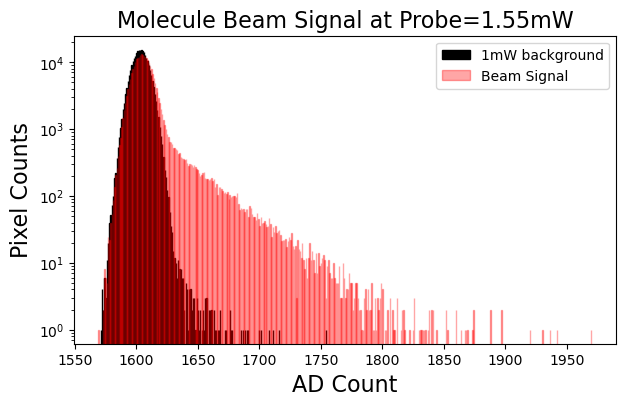

In [9]:
# Plot the histogram using plt.bar (faster than plt.hist)
plt.figure(figsize=(7, 4))

plt.bar(bin_edges1[:-1], hist1, width=np.diff(bin_edges1), edgecolor='black', color='black',  align='edge', label='1mW background') #113mW technically
plt.bar(ablated_1mW_bin_edges[:-1], ablated_1mW_hist, width=np.diff(ablated_1mW_bin_edges), edgecolor='red', color='red', alpha=0.35, align='edge', label='Beam Signal') #99uW technically
# Add title and labels
plt.title('Molecule Beam Signal at Probe=1.55mW', fontsize=16)
plt.xlabel('AD Count', fontsize=16)
plt.ylabel('Number of Pixels', fontsize=16)
plt.yscale('log', base=10)
plt.legend()

In [10]:
#Scan 7, sending in 1.55 mW
ablated_50mW_path = r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\14\0007\2025-02-14_0007_BaF_Fluorescence_0_rep00050.h5'
with h5py.File(ablated_50mW_path, 'r') as file:
    ablated_50mW_image = file['images/camera/fluorescence/frame'][:]
ablated_50mW_hist, ablated_50mW_bin_edges = np.histogram(ablated_50mW_image, bins=1000)  # Adjust the number of bins as needed

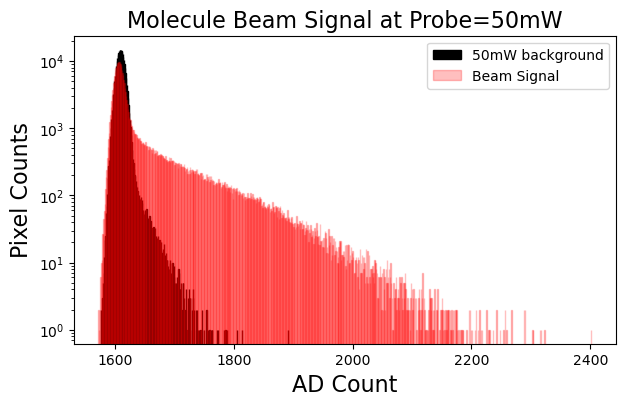

In [11]:
# Plot the histogram using plt.bar (faster than plt.hist)
plt.figure(figsize=(7, 4))

plt.bar(bin_edges4[:-1], hist4, width=np.diff(bin_edges4), edgecolor='black', color='black',  align='edge', label='50mW background') #113mW technically
plt.bar(ablated_50mW_bin_edges[:-1], ablated_50mW_hist, width=np.diff(ablated_50mW_bin_edges), edgecolor='red', color='red', alpha=0.25, align='edge', label='Beam Signal') #99uW technically
# Add title and labels
plt.title('Molecule Beam Signal at Probe=50mW', fontsize=16)
plt.xlabel('AD Count', fontsize=16)
plt.ylabel('Number of Pixels', fontsize=16)
plt.yscale('log', base=10)
plt.legend()

In [12]:
#Scan 9, sending in 100 mW
ablated_100mW_path = r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\14\0009\2025-02-14_0009_BaF_Fluorescence_0_rep00017.h5'
with h5py.File(ablated_100mW_path, 'r') as file:
    ablated_100mW_image = file['images/camera/fluorescence/frame'][:]
ablated_100mW_hist, ablated_100mW_bin_edges = np.histogram(ablated_100mW_image, bins=1000)  # Adjust the number of bins as needed

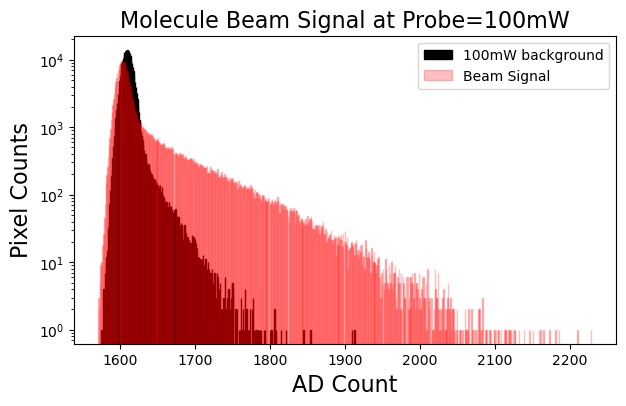

In [13]:
# Plot the histogram using plt.bar (faster than plt.hist)
plt.figure(figsize=(7, 4))

plt.bar(bin_edges5[:-1], hist5, width=np.diff(bin_edges5), edgecolor='black', color='black',  align='edge', label='100mW background') #113mW technically
plt.bar(ablated_100mW_bin_edges[:-1], ablated_100mW_hist, width=np.diff(ablated_100mW_bin_edges), edgecolor='red', color='red', alpha=0.25, align='edge', label='Beam Signal') #99uW technically
# Add title and labels
plt.title('Molecule Beam Signal at Probe=100mW', fontsize=16)
plt.xlabel('AD Count', fontsize=16)
plt.ylabel('Number of Pixels', fontsize=16)
plt.yscale('log', base=10)
plt.legend()

# Off-Diagonal Detetion (Semrock Filter 747-33)

In [14]:
# File path to your HDF5 file
file_pathB0 = r'C:\Users\PolyEDM\labscript-suite\userlib\analysislib\lyman29\background_747-33\0W\2025-02-21_0042_BaF_Fluorescence_0_rep00050.h5'
file_pathB3 = r'C:\Users\PolyEDM\labscript-suite\userlib\analysislib\lyman29\background_747-33\10mW\2025-02-21_0044_BaF_Fluorescence_0_rep00050.h5'
file_pathB5 = r'C:\Users\PolyEDM\labscript-suite\userlib\analysislib\lyman29\background_747-33\100mW\2025-02-21_0041_BaF_Fluorescence_0_rep00050.h5'

In [15]:
with h5py.File(file_pathB0, 'r') as file:
    image_dataB0 = file['images/camera/fluorescence/frame'][:]
with h5py.File(file_pathB3, 'r') as file:
    image_dataB3 = file['images/camera/fluorescence/frame'][:]
with h5py.File(file_pathB5, 'r') as file:
    image_dataB5 = file['images/camera/fluorescence/frame'][:]
histB0, bin_edgesB0 = np.histogram(image_dataB0, bins=1000)  # Adjust the number of bins as needed
histB3, bin_edgesB3 = np.histogram(image_dataB3, bins=1000)  # Adjust the number of bins as needed
histB5, bin_edgesB5 = np.histogram(image_dataB5, bins=1000)  # Adjust the number of bins as needed


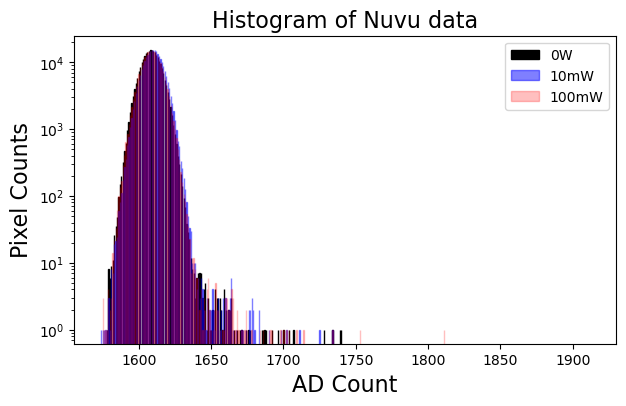

In [16]:
# Plot the histogram using plt.bar (faster than plt.hist)
plt.figure(figsize=(7, 4))
plt.xlim([1555,1930])
plt.bar(bin_edgesB0[:-1], histB0, width=np.diff(bin_edgesB0), edgecolor='black', color='black',  align='edge', label='0W') 
plt.bar(bin_edgesB3[:-1], histB3, width=np.diff(bin_edgesB3), edgecolor='blue', color='blue', alpha=0.5,  align='edge', label='10mW') 
plt.bar(bin_edgesB5[:-1], histB5, width=np.diff(bin_edgesB5), edgecolor='red', color='red', alpha=0.25, align='edge', label='100mW') #100mW technically

# Add title and labels
plt.title('Histogram of Nuvu data', fontsize=16)
plt.xlabel('AD Count', fontsize=16)
plt.ylabel('Number of Pixels', fontsize=16)
plt.yscale('log', base=10)
plt.legend()